In [1]:
import os
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.offline.offline import _plot_html
import plotly.graph_objs as go
print (__version__) # requires version >= 1.9.0
init_notebook_mode(connected=True)

from mpl_toolkits import mplot3d
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
%matplotlib notebook
#%matplotlib inline
from utils import series_supp as ss
from utils import data_factory as df
from utils import k_mean as km

2.5.1


In [2]:
cwd = os.getcwd()
os.chdir(cwd)
print(cwd)
factory = df.DataFactory(cwd)
store_path = "cluster\\"

RG24 = ss.SeriesSupp(cwd, factory, "RG24")
RG1 = ss.SeriesSupp(cwd, factory, "RG1")
GW = ss.SeriesSupp(cwd, factory, "GW")

C:\Users\utilisateur\Workspace_lab


In [3]:
GW.import_dataset()
RG24.import_dataset()

Load csv_prepro\GW: Done
Load csv_prepro\RG\precipiation_RG: Done


In [4]:
cluster_GW = km.Kmean(GW)
cluster_RG = km.Kmean(RG24)

In [5]:
name_file = "kmean_[2013, 2012]_allmonths7"
cluster_GW.read_cluster(store_path, name_file)

# rewrite pickle if needed: manually 

cluster_GW.last_readed["years"] = [2015, 2014, 2013, 2012]
cluster_GW.last_readed["months"] = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
cluster_GW.last_readed["days"] = False

import pickle

outfile = open(cluster_GW.store_path + "kmean_2015_2014_2013_2012_allmonths7" + ".pkl", "wb")
pickle.dump(cluster_GW.last_readed, outfile)
outfile.close()

cluster_RG.ss.years = cluster_GW.ss.years
cluster_RG.ss.months = cluster_GW.ss.months
cluster_RG.ss.days = cluster_GW.ss.days

In [6]:
#cluster_RG.ss.split_all()
cluster_RG.ss.years = [2012, 2013, 2014, 2015]
cluster_RG.ss.split_data_years()
cluster_GW.ss.years = [2012, 2013, 2014, 2015]
cluster_GW.ss.split_data_years()

cluster_RG.ploter.mode = "makers+lines"
cluster_RG.ploter.plot_scatter(cluster_RG.ss.tmp_dataset)

cluster_GW.change_mode(3)
cluster_GW.ploter.plot_scatter(cluster_GW.ss.tmp_dataset)

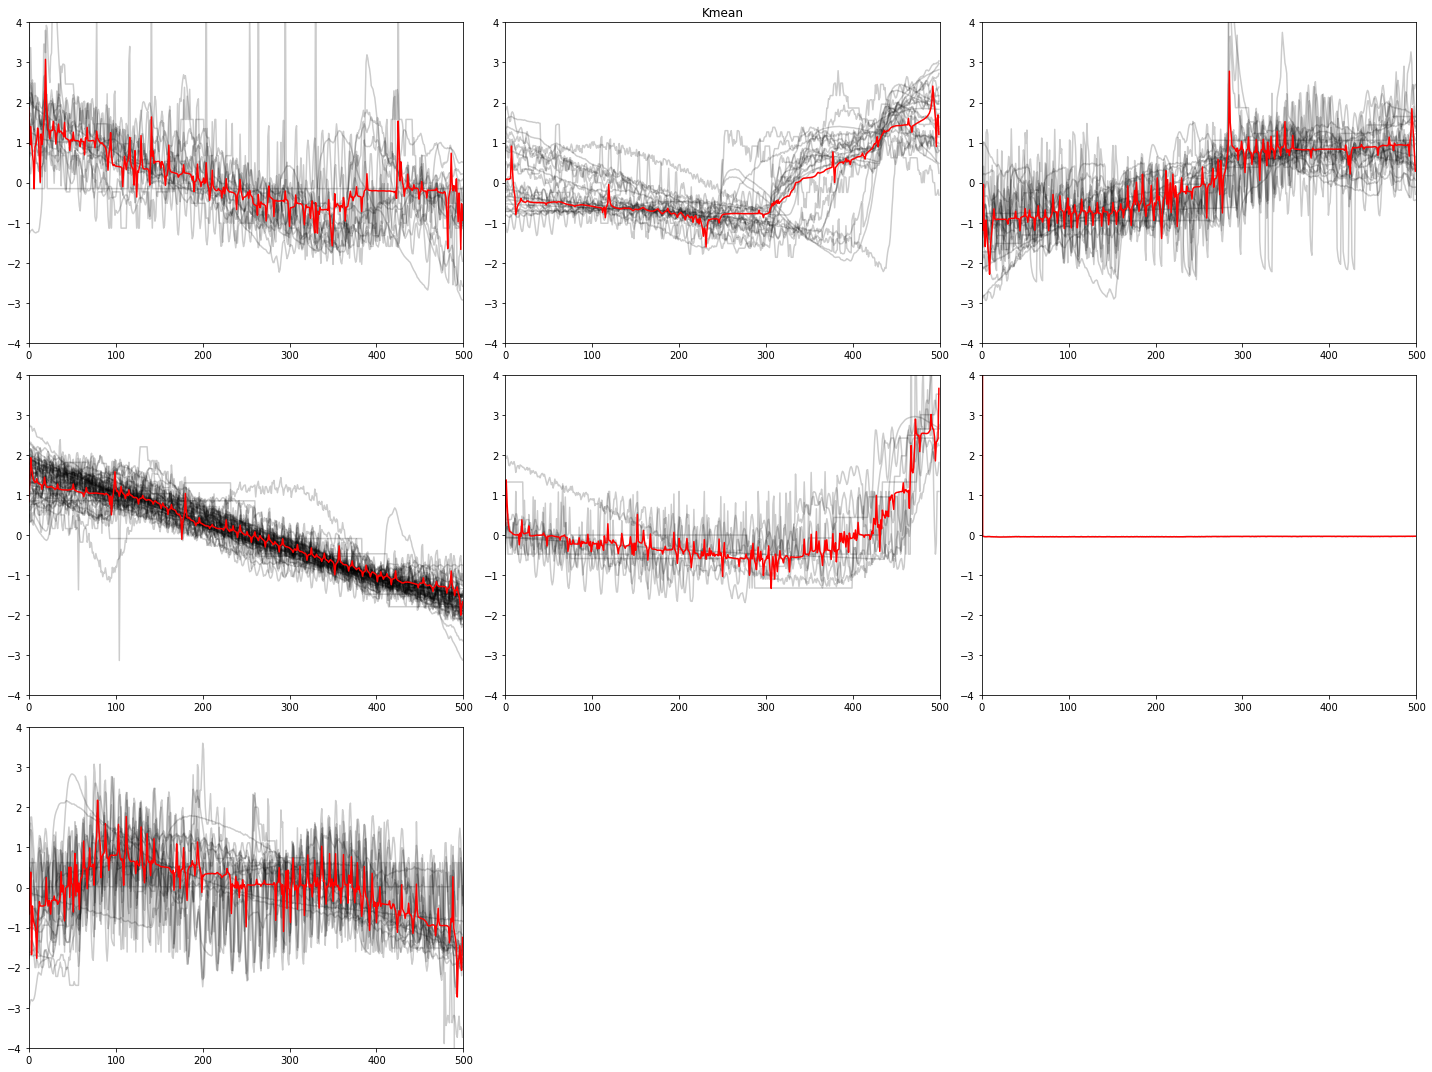

[2013, 2012]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Normalized: True
Sample size(0=None): 500
Algorithm used: Kmean
nb cluster: 7
Distance measure: softdtw



Counter({6: 19, 0: 16, 3: 54, 1: 25, 4: 10, 2: 22, 5: 1})

In [7]:
cluster_GW.ploter.plot_cluster_light()
file = open("cluster\\" + str(name_file) + ".txt", "r") 
print (file.read())
file.close()
cluster_GW.cluster_counter()
cluster_GW.counter

#Plotly cluster
cluster_GW.ploter.change_mode(2)
cluster_GW.ploter.plot_cluster()

In [8]:
cluster_GW.capteur_parser()

KeyError: 6

In [ ]:
cluster_GW.geo.plotly_3D(cluster_GW.cluster_by_name[4])

In [ ]:
#cluster_GW.capteurs_names
#cluster_GW.ts_clust
#cluster_GW.ts_name
#cluster_GW.capteur_parser()
#cluster_GW.cluster_by_name
#cluster_GW.geo.geo_GW.head()
#cluster_GW.geo.plot_3D_for_one_cluster(cluster_GW.cluster_by_name[1])
#colors = ["g", "r", "c", "y", "m", "k"]